#### import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#### AutoEncoder 기본

In [183]:
# 기본 코드
batch_size = 64
epochs = 20
lr = 0.001
device = 'mps'

# data load
transform = transforms.Compose([transforms.ToTensor()]) # 픽셀 자동 정규화

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# AutoEncoder
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.Encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # 16x14x14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # 32x7x7
            nn.ReLU(),
            nn.Conv2d(32, 32, 7),  # 32x1x1 (최종 압축)
            nn.ReLU()
        )
        
        self.Decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 32, 7),  # 32x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # 16x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # 1x28x28
            nn.Sigmoid() # 입력이 자동 정규화 되었으므로, 출력도 정규화 되어야지 loss 정확
        )
    def forward(self, x):
        encoded = self.Encoder(x)
        decoded = self.Decoder(encoded)
        return encoded, decoded

# AutoEncoder 학습
autoencoder = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)
min_loss = 1
loss_list = []

for epoch in range(epochs):
    autoencoder.train()
    running_loss = 0.0
    
    for images, _ in train_loader:
        images = images.to(device)
        
        optimizer.zero_grad()
        encoded, outputs = autoencoder(images)
        loss = criterion(outputs, images)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    avg_loss = running_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    # Encoder save
    if avg_loss < min_loss:
        min_loss = avg_loss
        torch.save(autoencoder.Encoder.state_dict(), 'encoder_weights.pth')
        print(f'    Min Loss : Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f} ')

Epoch [1/20], Loss: 0.0408
    Min Loss : Epoch [1/20], Loss: 0.0408 
Epoch [2/20], Loss: 0.0151
    Min Loss : Epoch [2/20], Loss: 0.0151 
Epoch [3/20], Loss: 0.0132
    Min Loss : Epoch [3/20], Loss: 0.0132 
Epoch [4/20], Loss: 0.0122
    Min Loss : Epoch [4/20], Loss: 0.0122 
Epoch [5/20], Loss: 0.0115
    Min Loss : Epoch [5/20], Loss: 0.0115 
Epoch [6/20], Loss: 0.0110
    Min Loss : Epoch [6/20], Loss: 0.0110 
Epoch [7/20], Loss: 0.0107
    Min Loss : Epoch [7/20], Loss: 0.0107 
Epoch [8/20], Loss: 0.0104
    Min Loss : Epoch [8/20], Loss: 0.0104 
Epoch [9/20], Loss: 0.0101
    Min Loss : Epoch [9/20], Loss: 0.0101 
Epoch [10/20], Loss: 0.0100
    Min Loss : Epoch [10/20], Loss: 0.0100 
Epoch [11/20], Loss: 0.0098
    Min Loss : Epoch [11/20], Loss: 0.0098 
Epoch [12/20], Loss: 0.0096
    Min Loss : Epoch [12/20], Loss: 0.0096 
Epoch [13/20], Loss: 0.0095
    Min Loss : Epoch [13/20], Loss: 0.0095 
Epoch [14/20], Loss: 0.0094
    Min Loss : Epoch [14/20], Loss: 0.0094 
Epoch [15/

#### layer 추가

In [130]:
# # 인코더 layer 추가
# batch_size = 64
# epochs = 100
# lr = 0.001
# device = 'mps'

# # data load
# transform = transforms.Compose([transforms.ToTensor()]) # 픽셀 자동 정규화

# train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# # AutoEncoder
# class AutoEncoder(nn.Module):
#     def __init__(self):
#         super(AutoEncoder, self).__init__()
        
#         self.Encoder = nn.Sequential(
#             nn.Conv2d(1, 16, 3, stride=2, padding=1),  # 16x14x14
#             nn.ReLU(),
#             nn.Conv2d(16, 32, 3, stride=2, padding=1), # 32x7x7
#             nn.ReLU(),
#             nn.Conv2d(32, 32, 3, stride=1, padding=1),  # 32x7x7 (변경)
#             nn.ReLU(),
#             nn.Conv2d(32, 32, 3, stride=1, padding=1),  # 32x7x7 (변경)
#             nn.ReLU(),
#             nn.Conv2d(32, 32, 3, stride=1, padding=1),  # 32x7x7 (변경)
#             nn.ReLU(),
#             nn.Conv2d(32, 32, 7),  # 32x1x1 (최종 압축)
#         )
        
#         self.Decoder = nn.Sequential(
#             nn.ConvTranspose2d(32, 32, 7),  # 32x7x7
#             nn.ReLU(),
#             nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # 16x14x14
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # 1x28x28
#             nn.Sigmoid() # 입력이 자동 정규화 되었으므로, 출력도 정규화 되어야지 loss 정확
#         )
#     def forward(self, x):
#         encoded = self.Encoder(x)
#         decoded = self.Decoder(encoded)
#         return encoded, decoded

# # AutoEncoder 학습
# autoencoder = AutoEncoder().to(device)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(autoencoder.parameters(), lr=lr)
# min_loss = 1
# loss_list = []

# for epoch in range(epochs):
#     autoencoder.train()
#     running_loss = 0.0
    
#     for images, _ in train_loader:
#         images = images.to(device)
        
#         optimizer.zero_grad()
#         encoded, outputs = autoencoder(images)
#         loss = criterion(outputs, images)

#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
        
#     avg_loss = running_loss / len(train_loader)
#     loss_list.append(avg_loss)
#     print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
#     # Encoder save
#     if avg_loss < min_loss:
#         min_loss = avg_loss
#         torch.save(autoencoder.Encoder.state_dict(), 'encoder_weights.pth')
#         print(f'    Min Loss : Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f} ')

Epoch [1/100], Loss: 0.0406
    Min Loss : Epoch [1/100], Loss: 0.0406 
Epoch [2/100], Loss: 0.0115
    Min Loss : Epoch [2/100], Loss: 0.0115 
Epoch [3/100], Loss: 0.0085
    Min Loss : Epoch [3/100], Loss: 0.0085 
Epoch [4/100], Loss: 0.0073
    Min Loss : Epoch [4/100], Loss: 0.0073 
Epoch [5/100], Loss: 0.0064
    Min Loss : Epoch [5/100], Loss: 0.0064 
Epoch [6/100], Loss: 0.0058
    Min Loss : Epoch [6/100], Loss: 0.0058 
Epoch [7/100], Loss: 0.0054
    Min Loss : Epoch [7/100], Loss: 0.0054 
Epoch [8/100], Loss: 0.0051
    Min Loss : Epoch [8/100], Loss: 0.0051 
Epoch [9/100], Loss: 0.0049
    Min Loss : Epoch [9/100], Loss: 0.0049 
Epoch [10/100], Loss: 0.0048
    Min Loss : Epoch [10/100], Loss: 0.0048 
Epoch [11/100], Loss: 0.0046
    Min Loss : Epoch [11/100], Loss: 0.0046 
Epoch [12/100], Loss: 0.0045
    Min Loss : Epoch [12/100], Loss: 0.0045 
Epoch [13/100], Loss: 0.0045
    Min Loss : Epoch [13/100], Loss: 0.0045 
Epoch [14/100], Loss: 0.0044
    Min Loss : Epoch [14/10

#### batchnorm 추가

In [179]:
# batch norm 추가
batch_size = 64
epochs = 20
lr = 0.001
device = 'mps'

# data load
transform = transforms.Compose([transforms.ToTensor()]) # 픽셀 자동 정규화

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# AutoEncoder
# AutoEncoder with BatchNorm
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.Encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),  # 16x14x14
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), # 32x7x7
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, 7),  # 32x1x1
        )
        
        self.Decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 32, 7),  # 32x7x7
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # 16x14x14
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),  # 1x28x28
            nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.Encoder(x)
        decoded = self.Decoder(encoded)
        return encoded, decoded

# AutoEncoder 학습
autoencoder = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)
min_loss = 1
loss_list = []

for epoch in range(epochs):
    autoencoder.train()
    running_loss = 0.0
    
    for images, _ in train_loader:
        images = images.to(device)
        
        optimizer.zero_grad()
        encoded, outputs = autoencoder(images)
        loss = criterion(outputs, images)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    avg_loss = running_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    # Encoder save
    if avg_loss < min_loss:
        min_loss = avg_loss
        torch.save(autoencoder.Encoder.state_dict(), 'encoder_weights.pth')
        print(f'    Min Loss : Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f} ')

Epoch [1/20], Loss: 0.0290
    Min Loss : Epoch [1/20], Loss: 0.0290 
Epoch [2/20], Loss: 0.0066
    Min Loss : Epoch [2/20], Loss: 0.0066 
Epoch [3/20], Loss: 0.0056
    Min Loss : Epoch [3/20], Loss: 0.0056 
Epoch [4/20], Loss: 0.0052
    Min Loss : Epoch [4/20], Loss: 0.0052 
Epoch [5/20], Loss: 0.0049
    Min Loss : Epoch [5/20], Loss: 0.0049 
Epoch [6/20], Loss: 0.0047
    Min Loss : Epoch [6/20], Loss: 0.0047 
Epoch [7/20], Loss: 0.0046
    Min Loss : Epoch [7/20], Loss: 0.0046 
Epoch [8/20], Loss: 0.0045
    Min Loss : Epoch [8/20], Loss: 0.0045 
Epoch [9/20], Loss: 0.0044
    Min Loss : Epoch [9/20], Loss: 0.0044 
Epoch [10/20], Loss: 0.0043
    Min Loss : Epoch [10/20], Loss: 0.0043 
Epoch [11/20], Loss: 0.0043
    Min Loss : Epoch [11/20], Loss: 0.0043 
Epoch [12/20], Loss: 0.0042
    Min Loss : Epoch [12/20], Loss: 0.0042 
Epoch [13/20], Loss: 0.0042
    Min Loss : Epoch [13/20], Loss: 0.0042 
Epoch [14/20], Loss: 0.0041
    Min Loss : Epoch [14/20], Loss: 0.0041 
Epoch [15/

#### layer 추가 + encoder stride 1 layer 추가 

In [174]:
# layer 추가
batch_size = 64
epochs = 100
lr = 0.001
device = 'mps'

# data load
transform = transforms.Compose([transforms.ToTensor()]) # 픽셀 자동 정규화

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# AutoEncoder
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.Encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),    # 16x14x14
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),   # 32x7x7
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=1, padding=1),   # 64x7x7
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),  # 128x7x7
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, stride=1, padding=1), 
            nn.ReLU(),
            nn.Conv2d(128, 32, 7),                       # 32x1x1
        )
        
        self.Decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 128, 7),                         # 128x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=1, padding=1),   # 64x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=1, padding=1),    # 32x7x7
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),  # 16x14x14
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),   # 1x28x28
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.Encoder(x)
        decoded = self.Decoder(encoded)
        return encoded, decoded



# AutoEncoder 학습
autoencoder = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)
min_loss = 1
loss_list = []

for epoch in range(epochs):
    autoencoder.train()
    running_loss = 0.0
    
    for images, _ in train_loader:
        images = images.to(device)
        
        optimizer.zero_grad()
        encoded, outputs = autoencoder(images)
        loss = criterion(outputs, images)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    avg_loss = running_loss / len(train_loader)
    loss_list.append(avg_loss)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
    
    # Encoder save
    if avg_loss < min_loss:
        min_loss = avg_loss
        torch.save(autoencoder.Encoder.state_dict(), 'encoder_weights.pth')
        print(f'    Min Loss : Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f} ')

Epoch [1/100], Loss: 0.0314
    Min Loss : Epoch [1/100], Loss: 0.0314 
Epoch [2/100], Loss: 0.0085
    Min Loss : Epoch [2/100], Loss: 0.0085 
Epoch [3/100], Loss: 0.0062
    Min Loss : Epoch [3/100], Loss: 0.0062 
Epoch [4/100], Loss: 0.0051
    Min Loss : Epoch [4/100], Loss: 0.0051 
Epoch [5/100], Loss: 0.0045
    Min Loss : Epoch [5/100], Loss: 0.0045 
Epoch [6/100], Loss: 0.0040
    Min Loss : Epoch [6/100], Loss: 0.0040 
Epoch [7/100], Loss: 0.0037
    Min Loss : Epoch [7/100], Loss: 0.0037 
Epoch [8/100], Loss: 0.0035
    Min Loss : Epoch [8/100], Loss: 0.0035 
Epoch [9/100], Loss: 0.0033
    Min Loss : Epoch [9/100], Loss: 0.0033 
Epoch [10/100], Loss: 0.0032
    Min Loss : Epoch [10/100], Loss: 0.0032 
Epoch [11/100], Loss: 0.0031
    Min Loss : Epoch [11/100], Loss: 0.0031 
Epoch [12/100], Loss: 0.0030
    Min Loss : Epoch [12/100], Loss: 0.0030 
Epoch [13/100], Loss: 0.0030
    Min Loss : Epoch [13/100], Loss: 0.0030 
Epoch [14/100], Loss: 0.0029
    Min Loss : Epoch [14/10

##### loss

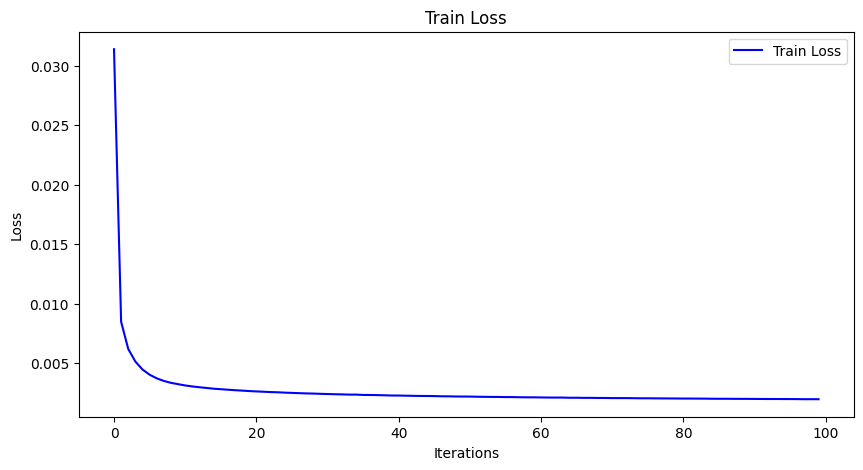

In [175]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(loss_list, label="Train Loss", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend() 
plt.show()

#### classification 기본 

In [184]:
# Classification - pretrained model o
criterion = nn.CrossEntropyLoss()
epochs = 20

class Classifier(nn.Module):
    def __init__(self, encoder):
        super(Classifier, self).__init__()
        self.encoder = encoder  
        self.head = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(32, 10)  
        )

    def forward(self, x):
        with torch.no_grad(): 
            x = self.encoder(x)
        x = self.head(x)
        return x

def test_classifier(model, test_loader):
    model.eval()
    running_test_loss = 0.0  
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
                
    avg_test_loss = running_test_loss / len(test_loader)
    loss_test.append(avg_test_loss)

    return 100 * correct / total, avg_test_loss

# Classifier 학습 
loss_train = []
loss_test = []
max_acc = 1
best_epoch = 0

encoder = AutoEncoder().Encoder
encoder.load_state_dict(torch.load('encoder_weights.pth'))
encoder = encoder.to(device)
classifier = Classifier(encoder).to(device)

criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = optim.Adam(classifier.parameters(), lr=lr)

for epoch in range(epochs):
    classifier.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = classifier(images)
        loss = criterion_cls(outputs, labels)
        
        optimizer_cls.zero_grad()
        loss.backward()
        optimizer_cls.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    loss_train.append(avg_train_loss)
    
    accuracy, avg_test_loss = test_classifier(classifier, test_loader)
    if accuracy > max_acc:
        max_acc = accuracy
        best_epoch = epoch
    print(f"Epoch [{epoch+1}/20] | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f} | Test Acc: {accuracy:.2f}%")
print(f'Best accuracy : Epoch [{best_epoch+1}/{epochs}], Best Acc: {max_acc:.2f}%')
    

Epoch [1/20] | Train Loss: 1.9852 | Test Loss: 0.3616 | Test Acc: 88.98%
Epoch [2/20] | Train Loss: 0.3183 | Test Loss: 0.2816 | Test Acc: 91.61%
Epoch [3/20] | Train Loss: 0.2856 | Test Loss: 0.2722 | Test Acc: 92.02%
Epoch [4/20] | Train Loss: 0.2797 | Test Loss: 0.2622 | Test Acc: 92.07%
Epoch [5/20] | Train Loss: 0.2766 | Test Loss: 0.2574 | Test Acc: 92.23%
Epoch [6/20] | Train Loss: 0.2768 | Test Loss: 0.2514 | Test Acc: 92.56%
Epoch [7/20] | Train Loss: 0.2750 | Test Loss: 0.2556 | Test Acc: 92.33%
Epoch [8/20] | Train Loss: 0.2764 | Test Loss: 0.2557 | Test Acc: 92.47%
Epoch [9/20] | Train Loss: 0.2745 | Test Loss: 0.2561 | Test Acc: 92.49%
Epoch [10/20] | Train Loss: 0.2757 | Test Loss: 0.2678 | Test Acc: 92.16%
Epoch [11/20] | Train Loss: 0.2753 | Test Loss: 0.2767 | Test Acc: 91.70%
Epoch [12/20] | Train Loss: 0.2771 | Test Loss: 0.2551 | Test Acc: 92.29%
Epoch [13/20] | Train Loss: 0.2766 | Test Loss: 0.2533 | Test Acc: 92.55%
Epoch [14/20] | Train Loss: 0.2755 | Test Loss:

#### classification layer 추가

In [178]:
# Classification - pretrained model o
criterion = nn.CrossEntropyLoss()
epochs = 20

class Classifier(nn.Module):
    def __init__(self, encoder):
        super(Classifier, self).__init__()
        self.encoder = encoder  
        self.head = nn.Sequential(
        nn.Flatten(),                      # [B, 32]
        nn.Linear(32, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        
        nn.Linear(128, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        
        nn.Linear(64, 32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        
        nn.Linear(32, 10)                  # 최종 클래스 개수
    )


    def forward(self, x):
        with torch.no_grad(): 
            x = self.encoder(x)
        x = self.head(x)
        return x

def test_classifier(model, test_loader):
    model.eval()
    running_test_loss = 0.0  
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
                
    avg_test_loss = running_test_loss / len(test_loader)
    loss_test.append(avg_test_loss)

    return 100 * correct / total, avg_test_loss

# Classifier 학습 
loss_train = []
loss_test = []
max_acc = 1
best_epoch = 0

encoder = AutoEncoder().Encoder
encoder.load_state_dict(torch.load('encoder_weights.pth'))
encoder = encoder.to(device)
classifier = Classifier(encoder).to(device)

criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = optim.Adam(classifier.parameters(), lr=lr)

for epoch in range(epochs):
    classifier.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = classifier(images)
        loss = criterion_cls(outputs, labels)
        
        optimizer_cls.zero_grad()
        loss.backward()
        optimizer_cls.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    loss_train.append(avg_train_loss)
    
    accuracy, avg_test_loss = test_classifier(classifier, test_loader)
    if accuracy > max_acc:
        max_acc = accuracy
        best_epoch = epoch
    print(f"Epoch [{epoch+1}/20] | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f} | Test Acc: {accuracy:.2f}%")
print(f'Best accuracy : Epoch [{best_epoch+1}/{epochs}], Best Acc: {max_acc:.2f}%')
    

Epoch [1/20] | Train Loss: 0.2567 | Test Loss: 0.0694 | Test Acc: 98.01%
Epoch [2/20] | Train Loss: 0.0745 | Test Loss: 0.0491 | Test Acc: 98.53%
Epoch [3/20] | Train Loss: 0.0557 | Test Loss: 0.0414 | Test Acc: 98.72%
Epoch [4/20] | Train Loss: 0.0469 | Test Loss: 0.0418 | Test Acc: 98.68%
Epoch [5/20] | Train Loss: 0.0429 | Test Loss: 0.0401 | Test Acc: 98.75%
Epoch [6/20] | Train Loss: 0.0360 | Test Loss: 0.0396 | Test Acc: 98.74%
Epoch [7/20] | Train Loss: 0.0321 | Test Loss: 0.0398 | Test Acc: 98.70%
Epoch [8/20] | Train Loss: 0.0294 | Test Loss: 0.0433 | Test Acc: 98.77%
Epoch [9/20] | Train Loss: 0.0283 | Test Loss: 0.0397 | Test Acc: 98.79%
Epoch [10/20] | Train Loss: 0.0237 | Test Loss: 0.0372 | Test Acc: 98.86%
Epoch [11/20] | Train Loss: 0.0251 | Test Loss: 0.0367 | Test Acc: 98.97%
Epoch [12/20] | Train Loss: 0.0229 | Test Loss: 0.0367 | Test Acc: 98.84%
Epoch [13/20] | Train Loss: 0.0204 | Test Loss: 0.0350 | Test Acc: 98.96%
Epoch [14/20] | Train Loss: 0.0193 | Test Loss:

##### loss

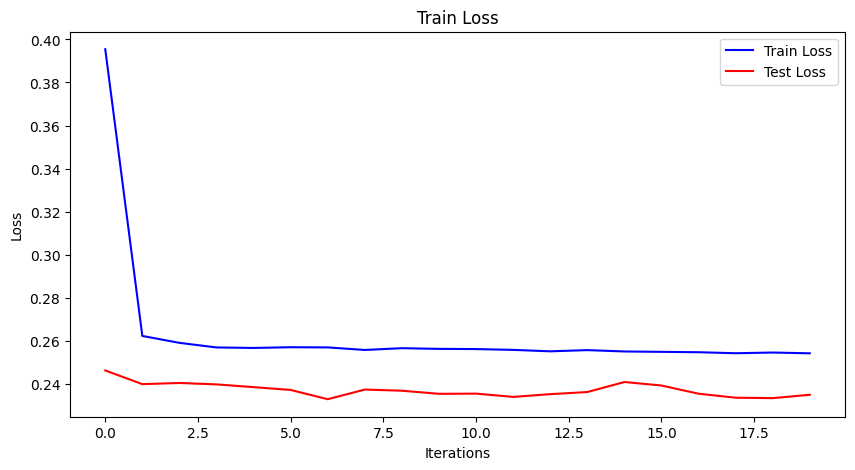

In [45]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(loss_train, label="Train Loss", color='blue')
plt.plot(loss_test, label="Test Loss", color='red')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend() 
plt.show()

#### classification - pretrained model X

In [182]:
# Classification - pretrained model X -> encoder도 같이 학습 시킴
criterion = nn.CrossEntropyLoss()
epochs = 20

class Classifier(nn.Module):
    def __init__(self, encoder):
        super(Classifier, self).__init__()
        self.encoder = encoder  
        self.head = nn.Sequential(
            nn.Flatten(),                      # [B, 32]
        nn.Linear(32, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        
        nn.Linear(128, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        
        nn.Linear(64, 32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        
        nn.Linear(32, 10)  
        )

    def forward(self, x): 
        x = self.encoder(x)
        x = self.head(x)
        return x

def test_classifier(model, test_loader):
    model.eval()
    running_test_loss = 0.0  
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
                
    avg_test_loss = running_test_loss / len(test_loader)
    loss_test.append(avg_test_loss)

    return 100 * correct / total, avg_test_loss

# Classifier 학습 
loss_train = []
loss_test = []

encoder = AutoEncoder().Encoder.to(device)
# encoder.load_state_dict(torch.load('encoder_weights.pth'))
# encoder = encoder.to(device)
classifier = Classifier(encoder).to(device)

criterion_cls = nn.CrossEntropyLoss()
optimizer_cls = optim.Adam(classifier.parameters(), lr=lr)

for epoch in range(epochs):
    classifier.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = classifier(images)
        loss = criterion_cls(outputs, labels)
        
        optimizer_cls.zero_grad()
        loss.backward()
        optimizer_cls.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    loss_train.append(avg_train_loss)
   
    accuracy, avg_test_loss = test_classifier(classifier, test_loader)
    print(f"Epoch [{epoch+1}/20] | Train Loss: {avg_train_loss:.4f} | Test Loss: {avg_test_loss:.4f} | Test Acc: {accuracy:.2f}%")


Epoch [1/20] | Train Loss: 0.2629 | Test Loss: 0.0738 | Test Acc: 97.87%
Epoch [2/20] | Train Loss: 0.0807 | Test Loss: 0.0516 | Test Acc: 98.43%
Epoch [3/20] | Train Loss: 0.0571 | Test Loss: 0.0518 | Test Acc: 98.29%
Epoch [4/20] | Train Loss: 0.0474 | Test Loss: 0.0404 | Test Acc: 98.73%
Epoch [5/20] | Train Loss: 0.0400 | Test Loss: 0.0333 | Test Acc: 98.93%
Epoch [6/20] | Train Loss: 0.0336 | Test Loss: 0.0359 | Test Acc: 98.91%
Epoch [7/20] | Train Loss: 0.0321 | Test Loss: 0.0364 | Test Acc: 98.89%
Epoch [8/20] | Train Loss: 0.0265 | Test Loss: 0.0363 | Test Acc: 98.74%
Epoch [9/20] | Train Loss: 0.0256 | Test Loss: 0.0326 | Test Acc: 99.02%
Epoch [10/20] | Train Loss: 0.0219 | Test Loss: 0.0344 | Test Acc: 98.97%
Epoch [11/20] | Train Loss: 0.0189 | Test Loss: 0.0387 | Test Acc: 98.88%
Epoch [12/20] | Train Loss: 0.0190 | Test Loss: 0.0405 | Test Acc: 98.92%
Epoch [13/20] | Train Loss: 0.0183 | Test Loss: 0.0382 | Test Acc: 98.94%
Epoch [14/20] | Train Loss: 0.0154 | Test Loss:

##### loss

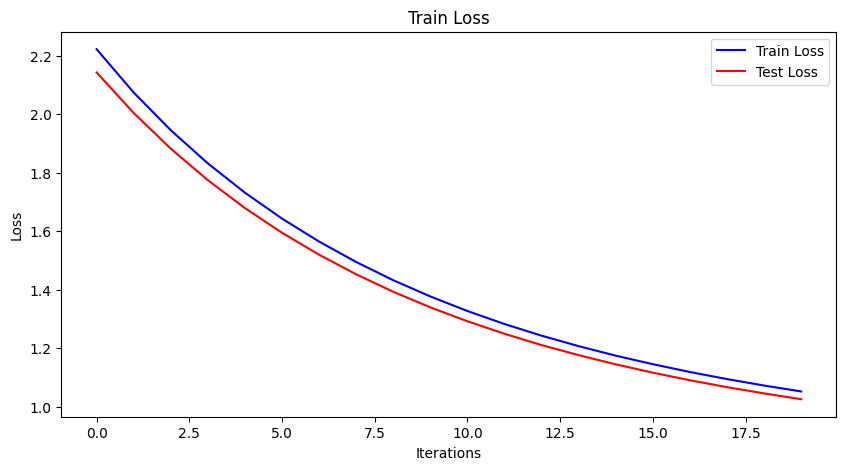

In [36]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(loss_train, label="Train Loss", color='blue')
plt.plot(loss_test, label="Test Loss", color='red')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Train Loss")
plt.legend() 
plt.show()

#### 이미지 확인

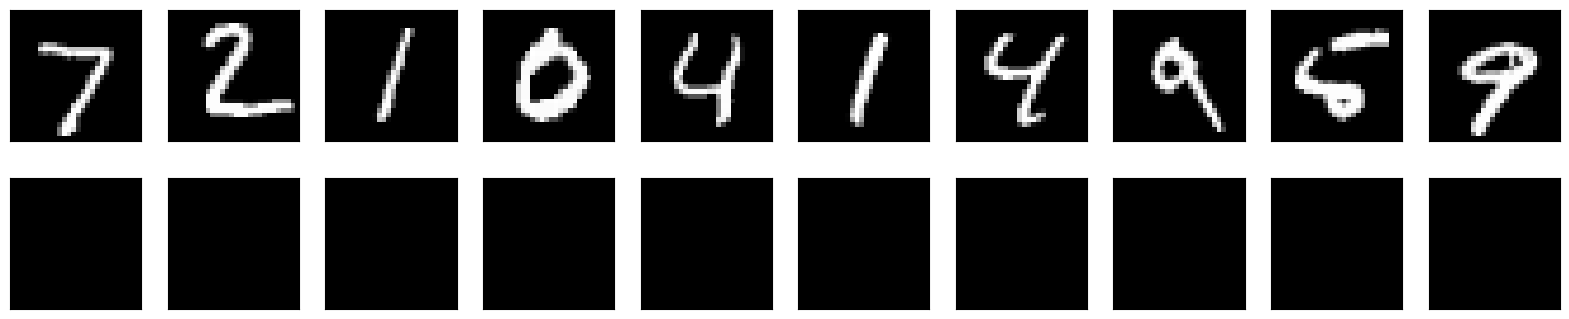

In [162]:
# Test the autoencoder
autoencoder.eval()
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        encoded, outputs = autoencoder(images)
        break

# Visualize the original and reconstructed images
# Reshape the flattened vectors back to 2D images (28x28)
# -1 keeps the batch size intact
inputs = images.view(-1, 28, 28)
outputs = outputs.view(-1, 28, 28)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(inputs[i].cpu().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(outputs[i].cpu().numpy(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()